In [1]:
!pip install tensorflow opencv-python matplotlib

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [17]:
from google.colab import files
# files.upload()  # Upload your kaggle.json file

# !mkdir -p ~/.kaggle
# !cp kaggle.json ~/.kaggle/
# !chmod 600 ~/.kaggle/kaggle.json
# !kaggle datasets download -d farzadnekouei/trash-type-image-dataset
# !unzip -q trash-type-image-dataset.zip -d data
!unrar x TrashType_Image_Dataset.rar data/

Streaming output truncated to the last 5000 lines.
Extracting  data/TrashType_Image_Dataset/all/cardboard_061.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_062.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_063.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_064.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_065.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_066.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_067.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_068.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_069.jpg             1%  OK 
Extracting  data/TrashType_Image_Dataset/all/cardboard_070.jpg             1%  OK 
Extracting  data/TrashType_Im

In [19]:
import os
os.listdir()
import numpy as np
import cv2
from tensorflow.keras.utils import to_categorical

IMG_SIZE = 128
DATA_DIR = "data/TrashType_Image_Dataset"
categories = os.listdir(DATA_DIR)

X, y = [], []
label_map = {label: idx for idx, label in enumerate(categories)}

for label in categories:
    folder_path = os.path.join(DATA_DIR, label)
    for img_file in os.listdir(folder_path):
        img_path = os.path.join(folder_path, img_file)
        try:
            img = cv2.imread(img_path)
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(label_map[label])
        except:
            continue

X = np.array(X) / 255.0
y = to_categorical(y)

In [20]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))





/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 105s 812ms/step - accuracy: 0.4570 - loss: 2.3631 - val_accuracy: 0.4797 - val_loss: 1.4949
Epoch 2/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 103s 814ms/step - accuracy: 0.5057 - loss: 1.4865 - val_accuracy: 0.4748 - val_loss: 1.4543
Epoch 3/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 141s 811ms/step - accuracy: 0.5009 - loss: 1.4399 - val_accuracy: 0.4787 - val_loss: 1.4106
Epoch 4/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 102s 805ms/step - accuracy: 0.4924 - loss: 1.3996 - val_accuracy: 0.4797 - val_loss: 1.4114
Epoch 5/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 141s 801ms/step - accuracy: 0.4927 - loss: 1.4074 - val_accuracy: 0.4797 - val_loss: 1.4437
Epoch 6/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 142s 799ms/step - accuracy: 0.4999 - loss: 1.3493 - val_accuracy: 0.4718 - val_loss: 1.3704
Epoch 7/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 142s 796ms/step - accuracy: 0.5005 - loss: 1.3164 - val_accuracy: 0.4827 - val_loss: 1.4075
Epoch 8/10
127/127 ━━━━━━━━━━━━━━━━━━━━ 141s 795ms/step - accuracy: 0.5155 -

In [24]:
loss, acc = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {acc*100:.2f}%")

32/32 ━━━━━━━━━━━━━━━━━━━━ 7s 212ms/step - accuracy: 0.4492 - loss: 1.4134
Test Accuracy: 45.30%


In [28]:
!pip install tensorflow opencv-python matplotlib

import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay


In [29]:
IMG_SIZE = 128
data_path = 'data/TrashType_Image_Dataset'
categories = sorted(os.listdir(data_path))
label_map = {cat: i for i, cat in enumerate(categories)}

X, y = [], []

for cat in categories:
    for img_name in os.listdir(os.path.join(data_path, cat)):
        img_path = os.path.join(data_path, cat, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
            X.append(img)
            y.append(label_map[cat])

X = np.array(X) / 255.0
y = np.array(y)

from tensorflow.keras.utils import to_categorical
y = to_categorical(y)

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, stratify=y)


In [30]:
train_aug = ImageDataGenerator(
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

val_aug = ImageDataGenerator()


In [26]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 3)),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(categories), activation='softmax')
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │     6,422,784 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,517,831 (24.86 MB)

 Trainable params: 6,517,831 (24.86 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
EPOCHS = 15
BATCH_SIZE = 32

history = model.fit(
    train_aug.flow(X_train, y_train, batch_size=BATCH_SIZE),
    validation_data=val_aug.flow(X_val, y_val),
    epochs=EPOCHS
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 0s 1s/step - accuracy: 0.4769 - loss: 1.7298

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


127/127 ━━━━━━━━━━━━━━━━━━━━ 148s 1s/step - accuracy: 0.4771 - loss: 1.7288 - val_accuracy: 0.4936 - val_loss: 1.5205
Epoch 2/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 147s 1s/step - accuracy: 0.4850 - loss: 1.5139 - val_accuracy: 0.4995 - val_loss: 1.4258
Epoch 3/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.4911 - loss: 1.4751 - val_accuracy: 0.4975 - val_loss: 1.3772
Epoch 4/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5013 - loss: 1.4097 - val_accuracy: 0.4985 - val_loss: 1.3557
Epoch 5/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4972 - loss: 1.3796 - val_accuracy: 0.4985 - val_loss: 1.3157
Epoch 6/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 146s 1s/step - accuracy: 0.5048 - loss: 1.3219 - val_accuracy: 0.4926 - val_loss: 1.3301
Epoch 7/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.4957 - loss: 1.3239 - val_accuracy: 0.4866 - val_loss: 1.3256
Epoch 8/15
127/127 ━━━━━━━━━━━━━━━━━━━━ 145s 1s/step - accuracy: 0.5111 - loss: 1.3131 - val_accuracy: 0.490

FileNotFoundError: [Errno 2] No such file or directory: 'SmartWasteClassifier/Week_2/training_graphs.png'

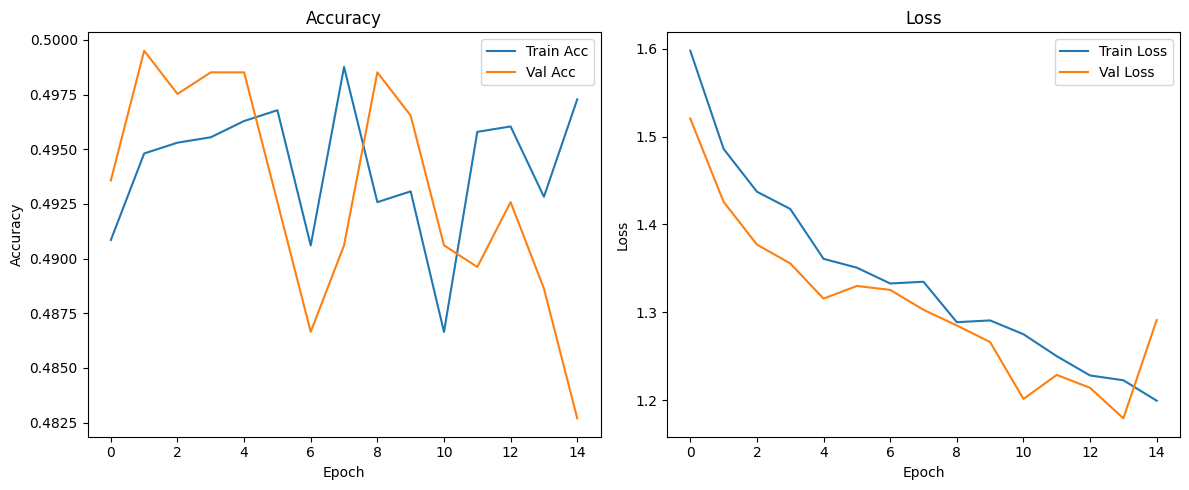

In [36]:
plt.figure(figsize=(12,5))

# Accuracy
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()

plt.show()


32/32 ━━━━━━━━━━━━━━━━━━━━ 12s 370ms/step


FileNotFoundError: [Errno 2] No such file or directory: 'Week_2/confusion_matrix.png'

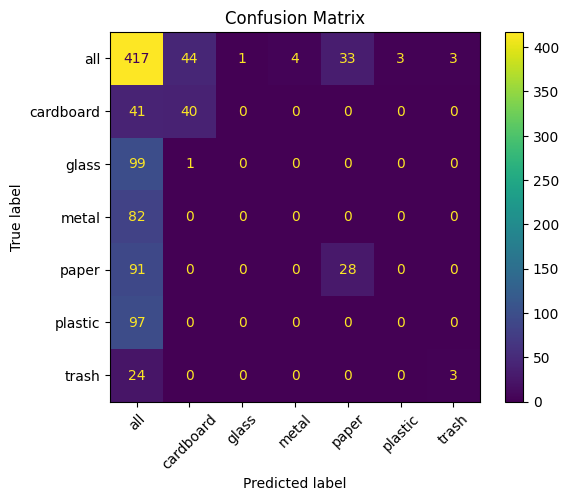

In [37]:
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_val, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=categories)
disp.plot(xticks_rotation=45)
plt.title("Confusion Matrix")

plt.show()
